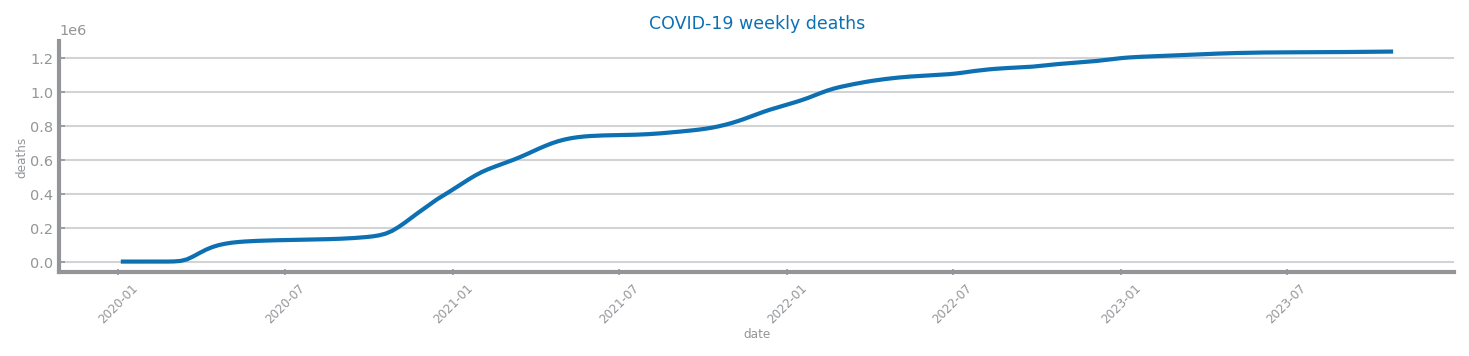

In [2]:
from pandas import read_csv, DataFrame, Series
from matplotlib.pyplot import figure, show, savefig
from dslabs_functions import plot_line_chart, HEIGHT

file_tag = "COVID-19"
target = "deaths"
data: DataFrame = read_csv(
    f"data/time_series/{'forecast_covid_single'}.csv",
    index_col="date",
    sep=",",
    decimal=".",
    parse_dates=True,
    infer_datetime_format=True,
)
series: Series = data[target]

figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    series.index.to_list(),
    series.to_list(),
    xlabel=series.index.name,
    ylabel=target,
    title=f"{file_tag} weekly {target}",
)
savefig(f"images/111{file_tag}_weekly_{target}.png")
show()

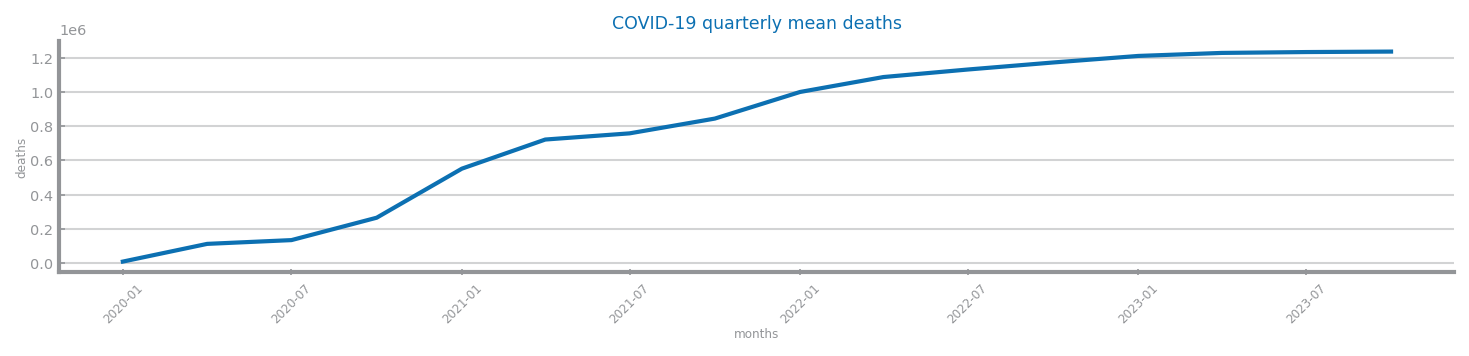

In [6]:
from pandas import Index, Period


def ts_aggregation_by(
    data: Series | DataFrame,
    gran_level: str = "D",
    agg_func: str = "mean",
) -> Series | DataFrame:
    df: Series | DataFrame = data.copy()
    index: Index[Period] = df.index.to_period(gran_level)
    df = df.groupby(by=index, dropna=True, sort=True).agg(agg_func)
    df.index.drop_duplicates()
    df.index = df.index.to_timestamp()

    return df


ss_days: Series = ts_aggregation_by(series, "Q")
figure(figsize=(3 * HEIGHT, HEIGHT / 2))
plot_line_chart(
    ss_days.index.to_list(),
    ss_days.to_list(),
    xlabel="months",
    ylabel=target,
    title=f"{file_tag} quarterly mean {target}",
)
savefig(f"images/{file_tag}_quarterly_mean_{target}.png")
show()

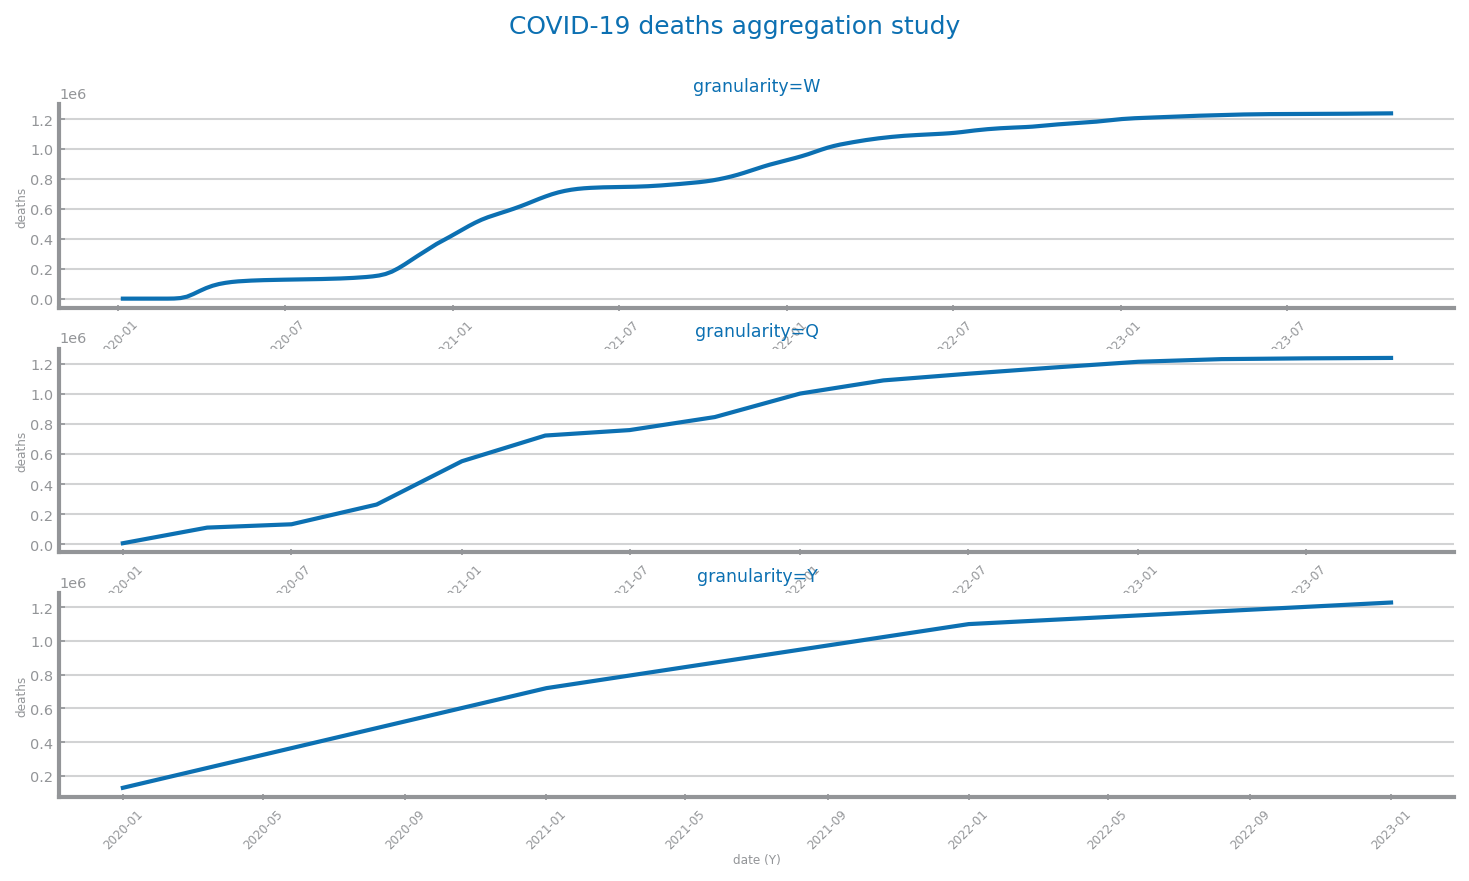

In [4]:
from matplotlib.pyplot import subplots
from matplotlib.axes import Axes
from matplotlib.figure import Figure


grans: list[str] = ["W", "Q", "Y"]
fig: Figure
axs: list[Axes]
fig, axs = subplots(len(grans), 1, figsize=(3 * HEIGHT, HEIGHT / 2 * len(grans)))
fig.suptitle(f"{file_tag} {target} aggregation study")

for i in range(len(grans)):
    ss: Series = ts_aggregation_by(series, grans[i])
    plot_line_chart(
        ss.index.to_list(),
        ss.to_list(),
        ax=axs[i],
        xlabel=f"{ss.index.name} ({grans[i]})",
        ylabel=target,
        title=f"granularity={grans[i]}",
    )
savefig(f"images/111{file_tag}_{target}_aggregation_study.png")
show()